In [1]:
import pandas as pd
import numpy as np
import pygwalker as pyg
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
import warnings
warnings.filterwarnings('ignore')



We can start by importing the dataframe. 

Below you can also find a link to download the dataset and other that had a better explanation of what each variable meant:

Dataset from https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset?resource=download
http://inseaddataanalytics.github.io/INSEADAnalytics/groupprojects/January2018FBL/IBM_Attrition_VSS.html

In [2]:
df_csv = pd.read_csv('./csv-files/WA_Fn-UseC_-HR-Employee-Attrition.csv')

Here we'll start our exploratory analysis, so we can have a better understanding of the data.

Note: In case you're not familiar with the vocabulary, a positive attrition means that the employee left the company.

In [3]:
df_csv.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df_csv.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Let's check for null values

In [5]:
df_csv[df_csv.isnull().values]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [6]:
df_csv.iloc[:7,:20]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964


In [7]:
df_csv.iloc[:7,20:]

,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0


As we can see, some columns had qualitative variables that need to be transformed into numerical values.

We'll start with binary values that have a logical encoding to it.

In [8]:
binary_columns = ['Attrition', 'Over18', 'OverTime', 'Gender']
df_with_treated_binary_values = df_csv.copy()


for v in binary_columns:
    df_with_treated_binary_values[v].replace({'Yes':1, 'Y':1, 'No':0, 'N':0, 'Female':1, 'Male':2}, inplace=True)

Now, let's move into the other categorical variables:

In [9]:
categorical_columns = ['BusinessTravel', 'Department','EducationField','JobRole','MaritalStatus']

enc = OrdinalEncoder()
labled = enc.fit_transform(df_with_treated_binary_values[categorical_columns])

df_encoded_values = df_with_treated_binary_values.copy()
df_encoded_values.loc[:,categorical_columns] = labled


In [10]:
df_encoded_values.iloc[:7,:20]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate
0,41,1,2.0,1102,2.0,1,2,1.0,1,1,2,1,94,3,2,7.0,4,2.0,5993,19479
1,49,0,1.0,279,1.0,8,1,1.0,1,2,3,2,61,2,2,6.0,2,1.0,5130,24907
2,37,1,2.0,1373,1.0,2,2,4.0,1,4,4,2,92,2,1,2.0,3,2.0,2090,2396
3,33,0,1.0,1392,1.0,3,4,1.0,1,5,4,1,56,3,1,6.0,3,1.0,2909,23159
4,27,0,2.0,591,1.0,2,1,3.0,1,7,1,2,40,3,1,2.0,2,1.0,3468,16632
5,32,0,1.0,1005,1.0,2,2,1.0,1,8,4,2,79,3,1,2.0,4,2.0,3068,11864
6,59,0,2.0,1324,1.0,3,3,3.0,1,10,3,1,81,4,1,2.0,1,1.0,2670,9964


All variables are now encoded!

Next step is droping the columns with constant values, or in other words, drop the columns where the standard deviation equals 0.

In [11]:
cols_with_zero_standard_deviation = df_encoded_values.columns[df_encoded_values.std(axis=0) == 0]
df_remove_constant_values = df_encoded_values.drop(columns = cols_with_zero_standard_deviation)
df_treated = df_remove_constant_values.copy()

That's it for the treatment, we have now the trated dataframe.

Let's move on with the data analysis by checking out how each variable correlates with each other 

<AxesSubplot:>

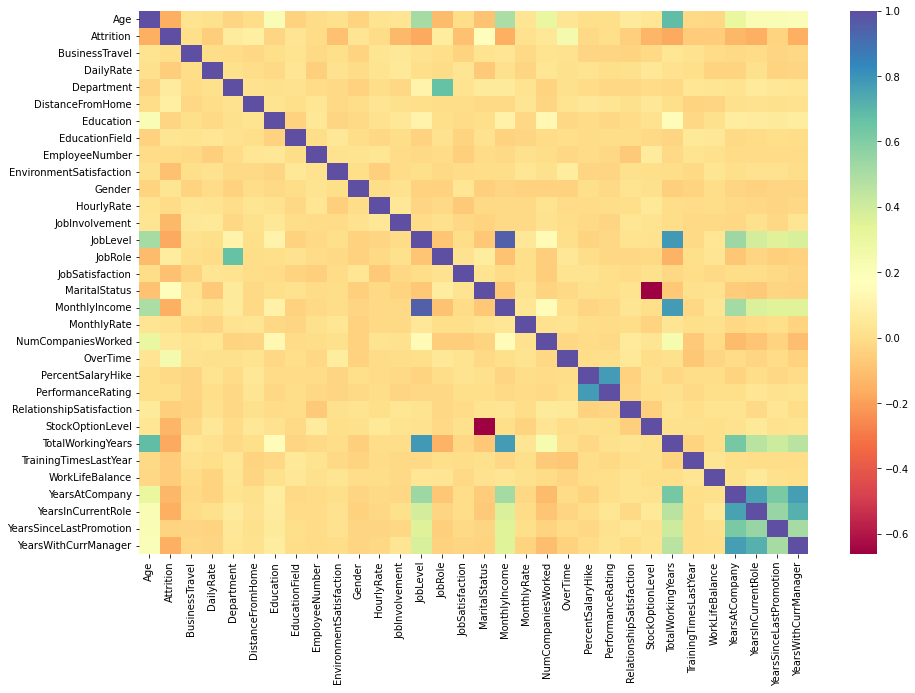

In [12]:
corr = df_treated.corr()
corr = (corr)

f, ax = plt.subplots(figsize=(15,10))

sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap='Spectral')

In [13]:
def get_top_correlated(variable, number):
    correlated_variables = corr.loc[abs(corr[variable]).sort_values(ascending=False).index,variable].head(number)

    return correlated_variables

In [14]:
get_top_correlated('Attrition', 15)

Attrition                  1.000000
OverTime                   0.246118
TotalWorkingYears         -0.171063
JobLevel                  -0.169105
MaritalStatus              0.162070
YearsInCurrentRole        -0.160545
MonthlyIncome             -0.159840
Age                       -0.159205
YearsWithCurrManager      -0.156199
StockOptionLevel          -0.137145
YearsAtCompany            -0.134392
JobInvolvement            -0.130016
JobSatisfaction           -0.103481
EnvironmentSatisfaction   -0.103369
DistanceFromHome           0.077924
Name: Attrition, dtype: float64

#### Interesting points about the variables correlation:

Variables with a **strong correlation** with an **employee attrition**:
- Working over time
- Few working years
- Low job level
- Low monthly income
- Young age
- Low job involvement
- Low job satisfaction
    
Age has a strong and interesting influence in employee's turnover:
- Older people have **more working years**, **higher incomes**, **higher job levels** and with that a **smaller chance of leaving the company.**

Let's start with analyzing the relation between working years and turnovers:

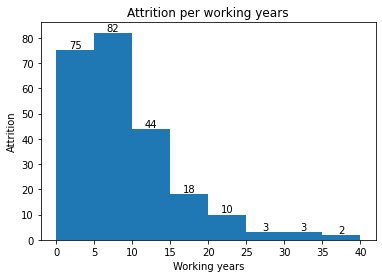

In [15]:
df_attrition_workingyears = df_treated[['TotalWorkingYears', 'Attrition']].groupby('TotalWorkingYears').sum().reset_index()

values, bins, bars = plt.hist(df_attrition_workingyears['TotalWorkingYears'], weights=df_attrition_workingyears['Attrition'], bins=8)
plt.xlabel("Working years")
plt.ylabel('Attrition')
plt.title('Attrition per working years')
plt.bar_label(bars)

plt.show()

Looking at the plot we can see a gathering of turnovers in employees with less than 10 working years. Let's look into years worked at the company. 

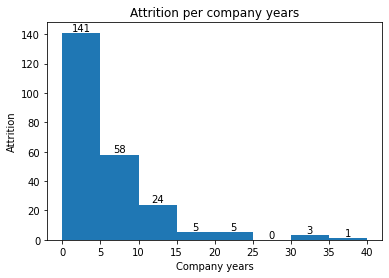

In [16]:
df_attrition_per_company_years = df_treated[['YearsAtCompany', 'Attrition']].groupby('YearsAtCompany').sum().reset_index()

values, bins, bars = plt.hist(df_attrition_per_company_years['YearsAtCompany'], weights=df_attrition_per_company_years['Attrition'], bins=8)
plt.xlabel("Company years")
plt.ylabel('Attrition')
plt.title('Attrition per company years')
plt.bar_label(bars)


plt.show()

Clearly there is a high number of turnovers during the first years working for the company, specially the first 5 years. Let's zoom into those first 10 years.

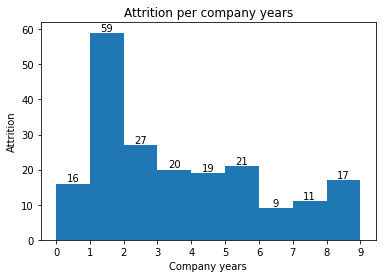

In [17]:
df_attrition_with_ten_years_at_company = df_attrition_per_company_years[df_attrition_per_company_years['YearsAtCompany']<10]

values, bins, bars = plt.hist(df_attrition_with_ten_years_at_company['YearsAtCompany'], weights=df_attrition_with_ten_years_at_company['Attrition'], bins=9)
plt.xticks(df_attrition_with_ten_years_at_company['YearsAtCompany'])
plt.xlabel("Company years")
plt.ylabel('Attrition')
plt.title('Attrition per company years')
plt.bar_label(bars)


plt.show()

With this analysis, we can punctuate a strong tendency of turnovers briefly after the employee completes one year at the company, this numbers keep up high up until 6 years at the company have been completed. 

This information alone could already be delivered to the HR department, that way they could make a deeper analysis of this cases, and understand the main motives that lead to those numbers, and how the company can draw plans to improve that.

---

As we saw, Job Level, Working Years, Age, and Company Years, are all highly correlated, so let's jump into analyzing that aren't so related to time or experience. Starting with over time:

In [18]:
df_treated[['Attrition', 'OverTime']].value_counts().reset_index()

,Attrition,OverTime,0
0,0,0,944
1,0,1,289
2,1,1,127
3,1,0,110


**More than half** of the employees **who left** the company **worked over time**, while **23%** of the employees who **didn't left** the company **work over time**. Let's get the top correlated variables with over time:

In [19]:
overtime_top_correlated = get_top_correlated('OverTime', 10)
overtime_top_correlated

OverTime                    1.000000
Attrition                   0.246118
TrainingTimesLastYear      -0.079113
EnvironmentSatisfaction     0.070132
RelationshipSatisfaction    0.048493
Gender                     -0.041924
YearsWithCurrManager       -0.041586
JobRole                     0.040662
YearsInCurrentRole         -0.029758
Age                         0.028062
Name: OverTime, dtype: float64

Aside from Attrition, there isn't a strong enough linear correlation between OverTime and the other variables. Maybe if we plot it we can find non linear correlations:

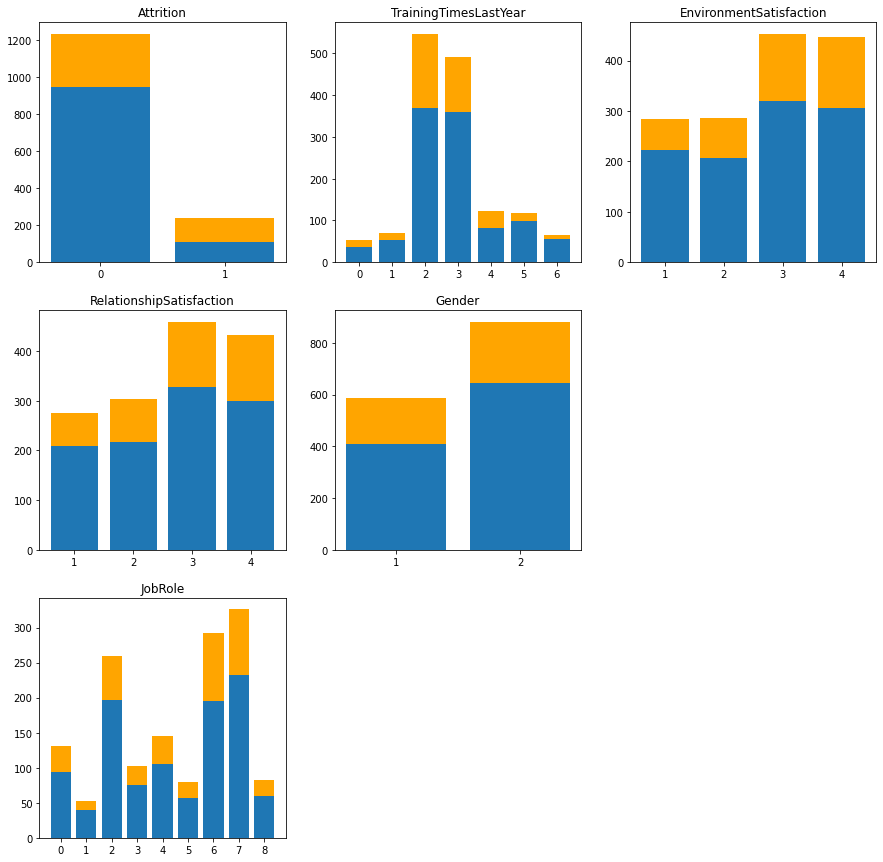

In [20]:
plt.figure(figsize=[15,15])

for feature_index, feature in enumerate(overtime_top_correlated.index):
    
    if feature in ['OverTime', 'YearsWithCurrManager', 'YearsInCurrentRole', 'Age']: continue

    df_grouped_by_feature = df_treated.groupby(['OverTime',feature]).count().reset_index()[['OverTime',feature, 'EmployeeNumber']]
    x_ticks_labels = df_grouped_by_feature[feature].unique().tolist()
    bottom_values = df_grouped_by_feature[df_grouped_by_feature['OverTime']==0]['EmployeeNumber'].to_list()
    top_values = df_grouped_by_feature[df_grouped_by_feature['OverTime']==1]['EmployeeNumber'].to_list()

    plt.subplot(3,3, feature_index)
    plt.bar(x=x_ticks_labels, height=bottom_values)
    plt.bar(x=x_ticks_labels, height=top_values, bottom=bottom_values, color='orange')

    plt.xticks(x_ticks_labels)
    plt.title(feature)

*Needs working, the different bar sizes makes it hard to compare the proportions between employees who work overtime (orange) and those who don't (blue), also **needs a legend** to make those colors clear!!!

---

## Predictive Models

We did our fair share of data analysis, but now we can move into predicting which employees are more likely to leave the company!

There's to ways we can approach this:
- One is clustering the employees into groups, and trying to find if any particular group has a higher attrition rate.
- Two is straight out classification, here we can use different algorithms to try to predict the likelihood of an employee leaving the company.

We'll try both and see which one work out better.

### Approach one (Clustering):

Before we start clustering the employees we need to apply a dimensionality reduction so we can have a better understanding of this clusters, and we'll use PCA to do so:

#### Dimensionality reduction:

In [21]:
df_for_principal_component_analysis = df_treated.drop(columns=['Attrition', 'EmployeeNumber'])
df_principal_components = PCA(n_components=2).fit_transform(df_for_principal_component_analysis)

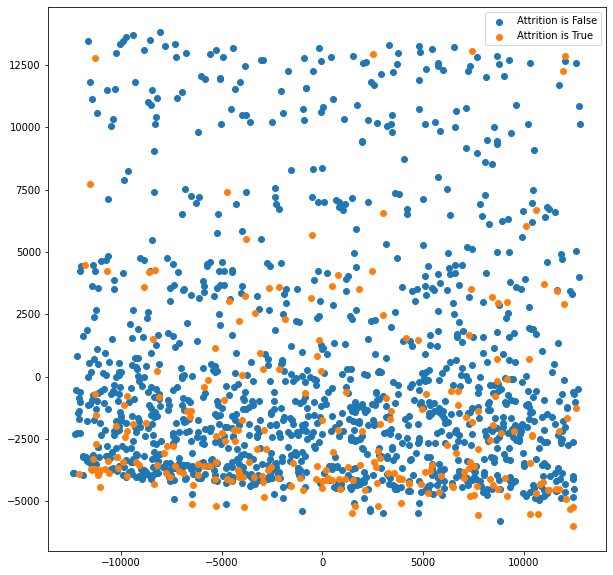

In [22]:
# plt.figure(figsize=[10,10])
fig, ax = plt.subplots()
fig.set_size_inches(10,10)

for is_attrited in [False, True]:
    row_filter = df_treated['Attrition']==is_attrited
    ax.scatter(df_principal_components[row_filter,0], df_principal_components[row_filter,1], label=(f'Attrition is {is_attrited}'))

plt.legend()
plt.show()

#### Creating the clustering model

Now that we reduced the dimensionality of the features, we can use Kmeans with a range of K values so we can findout which one is better suited for our case.

We'll plot the clusters with this different K values, and also store the inertia and silhouette values that we will use as metrics to choose the ideal number of clusters.

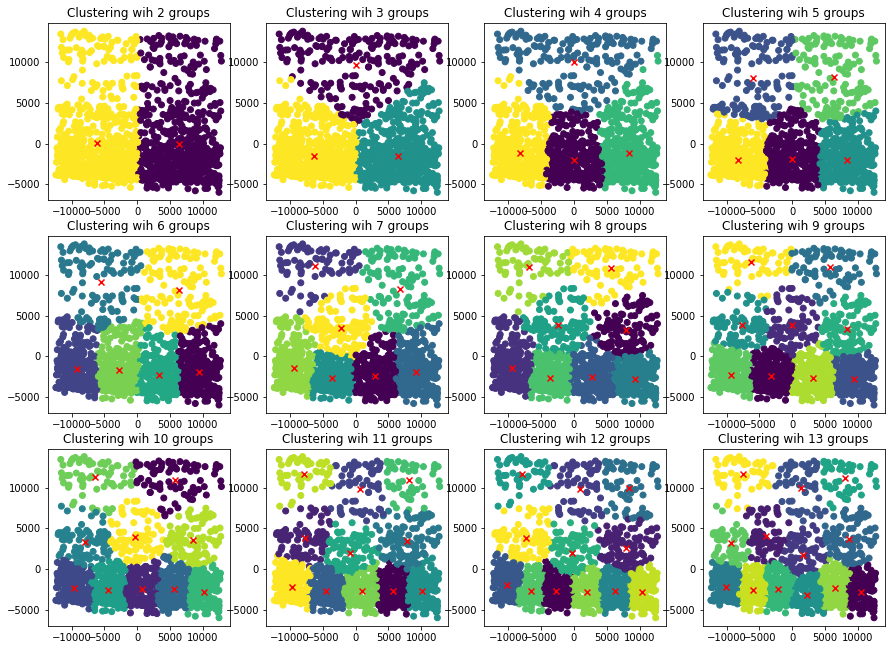

In [23]:
Ks = range(2,14)

inertia = []
silhouette = []

plt.figure(figsize=[15,15])

for k in Ks:
    kmeans = KMeans(n_clusters=k, random_state=42)

    model = kmeans.fit(df_principal_components)
    inertia.append(model.inertia_)
    silhouette.append(silhouette_score(df_principal_components, model.labels_))

    results = model.predict(df_principal_components)

    #plt.figure(figsize=[10,10])
    plt.subplot(4,4,k-1)
    plt.scatter(df_principal_components[:,0], df_principal_components[:,1], c=results)
    plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker='x', c='r')
    plt.title(f'Clustering wih {k} groups')

plt.show()

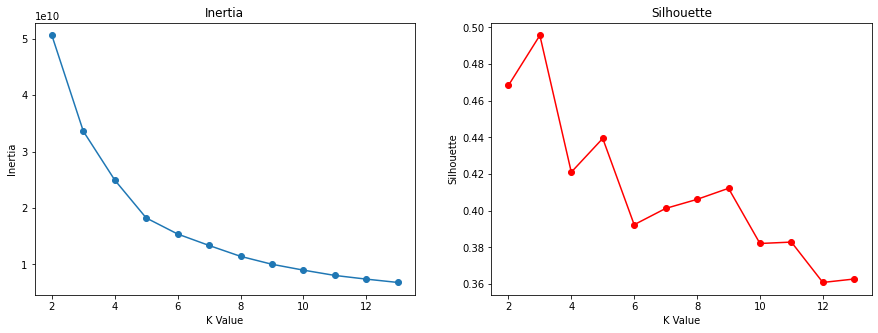

In [24]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(Ks, inertia, 'o-')
plt.xlabel('K Value')
plt.ylabel('Inertia')
plt.title('Inertia')

plt.subplot(1,2,2)
plt.plot(Ks, silhouette, 'o-', c='r')
plt.xlabel('K Value')
plt.ylabel('Silhouette')
plt.title('Silhouette')

plt.show()

In [25]:
max_silhouette_score = round(max(silhouette),3)

print(f'With a maximum silhouette score of {max_silhouette_score}, K=3 presents itself as the ideal number of clusters')

With a maximum silhouette score of 0.496, K=3 presents itself as the ideal number of clusters


Now, let's create the model using 3 clusters:

In [26]:
kmeans_3 = KMeans(n_clusters=3, random_state=42)
kmeans_3_model = kmeans_3.fit(df_principal_components)
predicted_classes = kmeans_3_model.predict(df_principal_components)
df_treated['Class'] = predicted_classes

Attrition by classes

In [27]:
df_treated[['Class', 'Attrition']].value_counts().sort_index()

Class  Attrition
0      0            188
       1             15
1      0            512
       1            110
2      0            533
       1            112
dtype: int64

As we can see, the classes aren't pure enough, class 1 and 2 have similar numbers and the ratio of positive attrition is quite low.
Even if we create a model that can rightfully predict the class, because of the low ratio of positives, we can't assume that employees in that class are at risk of attrition.
Possible causes might be that we didn't have enough data, or that the hyperparameters weren't accurate enough.

---
### Approach two (Classification model to predict attrition):

So now that we saw that the "class-path" isn't going to work, let's try a more direct aproach and use some classification algorithms using the Attrition variable as target.
We'll try the following algorithms:
- Logistic regression
- Naive Bayes
- KNN
- Decision Tree

First, we'll create a basic model using logistic regression, keeping all the variables, not balancing the data, and not doing any pre-processing. This way we can set a base line for the next models.

In [28]:
def get_model_metrics(X, y, trained_model):

    results = trained_model.predict(X)

    tn, fp, fn, tp = confusion_matrix(y, results).ravel()
    score = trained_model.score(X, y)
    try :
        roc = roc_auc_score(y, trained_model.decision_function(X))
    except :
        roc = 0
    recall = tp/(tp+fn)

    metrics = {
        'true_negatives': tn,
        'false_positives': fp,
        'false_negatives': fn,
        'true_positives': tp,
        'recall': round(recall, 2),
        'score': round(score, 2),
        'roc_auc':round(roc, 2)
    }

    return metrics

def get_model_train_test_metrics(X_train, y_train, X_test, y_test, model):

    train_metrics = get_model_metrics(X_train, y_train, model)
    test_metrics = get_model_metrics(X_test, y_test, model)

    metrics = [{'dataset':'train', 'metrics':train_metrics},
                {'dataset':'test', 'metrics': test_metrics}]

    return metrics


#### Splitting the train and test data

In [29]:
X_unsplit = df_treated.drop(columns=['Attrition', 'EmployeeNumber'])
y_unsplit = df_treated['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X_unsplit, y_unsplit, test_size=0.30, random_state=42)

In [30]:
y_train.value_counts()

0    853
1    176
Name: Attrition, dtype: int64

We can see that the target values aren't balanced.

#### Creating the first model

In [31]:
logit_1 = LogisticRegression(random_state=42)
logit_model1 = logit_1.fit(X_train, y_train)
metrics_model1 = get_model_train_test_metrics(X_train, y_train, X_test, y_test, logit_model1)

In [32]:
metrics_model1

[{'dataset': 'train',
  'metrics': {'true_negatives': 851,
   'false_positives': 2,
   'false_negatives': 164,
   'true_positives': 12,
   'recall': 0.07,
   'score': 0.84,
   'roc_auc': 0.76}},
 {'dataset': 'test',
  'metrics': {'true_negatives': 377,
   'false_positives': 3,
   'false_negatives': 60,
   'true_positives': 1,
   'recall': 0.02,
   'score': 0.86,
   'roc_auc': 0.66}}]

So with a basic model we got an accuracy of 0.86, looks good right? Well, not that fast, since the data wasn't really balanced the model learned a lot about predicting negative attrition, but poorly about positive attrition, as we can see on the confusion matrix.

Also, the recall value it's pretty low, in this case we want the recall as high as possible, since a positive attrition indicates that we need to pay attention to a certain employee, we rather have a false positive and have the company looking out for those employees, than a false negative and ending up loosing employees.

Whats next than? 
 - Feature selection
 - Balancing the input data

#### Logistic Regression 

First, let's try the same algorithm, but balancing the input data:

In [33]:
sm = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train, y_train)

In [34]:
y_train_balanced.value_counts()

0    853
1    853
Name: Attrition, dtype: int64

In [35]:
logit_1 = LogisticRegression(random_state=42)
logit_model2 = logit_1.fit(X_train_balanced, y_train_balanced)
metrics_model2 = get_model_train_test_metrics(X_train_balanced, y_train_balanced, X_test, y_test, logit_model2)

In [36]:
metrics_model2

[{'dataset': 'train',
  'metrics': {'true_negatives': 559,
   'false_positives': 294,
   'false_negatives': 230,
   'true_positives': 623,
   'recall': 0.73,
   'score': 0.69,
   'roc_auc': 0.75}},
 {'dataset': 'test',
  'metrics': {'true_negatives': 247,
   'false_positives': 133,
   'false_negatives': 29,
   'true_positives': 32,
   'recall': 0.52,
   'score': 0.63,
   'roc_auc': 0.65}}]

Look at that!!! A great improvement on the recall value, the score had a slight drop, but that's okay cause we got way better at predicting TP's. Now to the feature selection!

For the feature selection I hand picked a few variables that had a high correlation with the Attrition. Since we had lots of variables related to working years/market experience that had high correlation between them, I chose to not consider them. 

In [37]:
features_selected = [
    'OverTime',
    'TotalWorkingYears',
    'MonthlyIncome',
    'JobInvolvement',
    'JobSatisfaction',
    'EnvironmentSatisfaction'
]
X_train_selected_features = X_train[features_selected]
X_test_selected_features = X_test[features_selected]

X_train_selected_balanced, y_train_selected_balanced = sm.fit_resample(X_train_selected_features, y_train)

In [38]:
logit_1 = LogisticRegression(random_state=42)
logreg_model_3 = logit_1.fit(X_train_selected_balanced, y_train_selected_balanced)
metrics_model3 = get_model_train_test_metrics(X_train_selected_balanced,  y_train_selected_balanced, X_test_selected_features, y_test, logreg_model_3)
metrics_model3

[{'dataset': 'train',
  'metrics': {'true_negatives': 640,
   'false_positives': 213,
   'false_negatives': 331,
   'true_positives': 522,
   'recall': 0.61,
   'score': 0.68,
   'roc_auc': 0.77}},
 {'dataset': 'test',
  'metrics': {'true_negatives': 294,
   'false_positives': 86,
   'false_negatives': 26,
   'true_positives': 35,
   'recall': 0.57,
   'score': 0.75,
   'roc_auc': 0.73}}]

In [39]:
metrics_model3

[{'dataset': 'train',
  'metrics': {'true_negatives': 640,
   'false_positives': 213,
   'false_negatives': 331,
   'true_positives': 522,
   'recall': 0.61,
   'score': 0.68,
   'roc_auc': 0.77}},
 {'dataset': 'test',
  'metrics': {'true_negatives': 294,
   'false_positives': 86,
   'false_negatives': 26,
   'true_positives': 35,
   'recall': 0.57,
   'score': 0.75,
   'roc_auc': 0.73}}]

We got a slight improvement on the test dataset recall value, and a drop in the training dataset recall value.

Let's see where we can go by *messing* around with the parameters!

In [40]:
from sklearn.model_selection import GridSearchCV

First we'll see how the dataset without feature selection performs versus the one with feature selection

In [41]:
parameters = {
    'solver': ['liblinear', 'lbfgs'],
    'max_iter' : [100, 500, 1000, 10000],
    'C' : [0.1, 0.5, 1.0]
    
}

logit_gridsearch1 = GridSearchCV(logit_1, parameters).fit(X_train_balanced, y_train_balanced)

best_logit1 = logit_gridsearch1.best_estimator_
print(best_logit1)
metrics_model4 = get_model_train_test_metrics(X_train_balanced,  y_train_balanced, X_test, y_test, best_logit1)
metrics_model4

LogisticRegression(random_state=42, solver='liblinear')


[{'dataset': 'train',
  'metrics': {'true_negatives': 680,
   'false_positives': 173,
   'false_negatives': 158,
   'true_positives': 695,
   'recall': 0.81,
   'score': 0.81,
   'roc_auc': 0.89}},
 {'dataset': 'test',
  'metrics': {'true_negatives': 309,
   'false_positives': 71,
   'false_negatives': 30,
   'true_positives': 31,
   'recall': 0.51,
   'score': 0.77,
   'roc_auc': 0.75}}]

In [42]:
parameters = {
    'solver': ['liblinear', 'lbfgs'],
    'max_iter' : [100, 500, 1000, 10000],
    'C' : [0.1, 0.5, 1.0]
    
}

logit_gridsearch2 = GridSearchCV(logit_1, parameters).fit(X_train_selected_balanced, y_train_selected_balanced)

best_logit2 = logit_gridsearch2.best_estimator_
print(best_logit2)
metrics_model5 = get_model_train_test_metrics(X_train_selected_balanced,  y_train_selected_balanced, X_test_selected_features, y_test, best_logit2)
metrics_model5

LogisticRegression(C=0.5, max_iter=500, random_state=42)


[{'dataset': 'train',
  'metrics': {'true_negatives': 647,
   'false_positives': 206,
   'false_negatives': 196,
   'true_positives': 657,
   'recall': 0.77,
   'score': 0.76,
   'roc_auc': 0.83}},
 {'dataset': 'test',
  'metrics': {'true_negatives': 299,
   'false_positives': 81,
   'false_negatives': 24,
   'true_positives': 37,
   'recall': 0.61,
   'score': 0.76,
   'roc_auc': 0.73}}]

And we got the best Logistic Regression model with the following hyper-parameters and the selected features:

```LogisticRegression(C=0.5, max_iter=500, random_state=42)```

Now we can move on to a new algorithm! Naive Bayes

#### Naive Bayes

When we talk about Naive Bayes, we have some different options to consider like Gaussian, Multinomial and Bernoulli.

Since our data doesn't consist of continuou values we can't use Gaussian, and Bernoulli is also more indicated to boolean variables.

Multinomial Naive Bayes is our best fit, since it's designed for discret variables.

In [43]:
X_train_selected_balanced

,OverTime,TotalWorkingYears,MonthlyIncome,JobInvolvement,JobSatisfaction,EnvironmentSatisfaction
0,0,32,17399,3,4,4
1,0,7,4941,3,2,2
2,0,1,2679,3,2,2
3,0,32,18200,3,2,1
4,0,18,10445,3,2,2
...,...,...,...,...,...,...
1701,0,4,4603,3,3,3
1702,1,5,2398,3,2,3
1703,0,7,2214,1,2,1
1704,1,0,1604,3,1,3


In [44]:
mnb = MultinomialNB()
mnb_model6 = mnb.fit(X_train_selected_balanced,  y_train_selected_balanced)
metrics_model6 = get_model_train_test_metrics(X_train_selected_balanced,  y_train_selected_balanced, X_test_selected_features, y_test, mnb_model6)
metrics_model6

[{'dataset': 'train',
  'metrics': {'true_negatives': 434,
   'false_positives': 419,
   'false_negatives': 273,
   'true_positives': 580,
   'recall': 0.68,
   'score': 0.59,
   'roc_auc': 0}},
 {'dataset': 'test',
  'metrics': {'true_negatives': 187,
   'false_positives': 193,
   'false_negatives': 26,
   'true_positives': 35,
   'recall': 0.57,
   'score': 0.5,
   'roc_auc': 0}}]

There we have! Out best Naive Bayes model.
Into the next algorithm!

--- 

#### KNN

Same as LR, we'll create a base model without setting any parameters and than we will tune it.

In [45]:
knn_model1 = KNeighborsClassifier().fit(X_train_selected_balanced,  y_train_selected_balanced)
metrics_knn_model1 = get_model_train_test_metrics(X_train_selected_balanced,  y_train_selected_balanced, X_test_selected_features, y_test, knn_model1)
metrics_knn_model1

[{'dataset': 'train',
  'metrics': {'true_negatives': 639,
   'false_positives': 214,
   'false_negatives': 128,
   'true_positives': 725,
   'recall': 0.85,
   'score': 0.8,
   'roc_auc': 0}},
 {'dataset': 'test',
  'metrics': {'true_negatives': 243,
   'false_positives': 137,
   'false_negatives': 36,
   'true_positives': 25,
   'recall': 0.41,
   'score': 0.61,
   'roc_auc': 0}}]

So we got the base model for KNN with the following scores:
- Recall 0.41
- Score 0.61

Let's try with Grid Search now.

In [46]:
knn_parameters = {
    'n_neighbors' : [3, 5, 7, 10],
    'weights' : ['uniform', 'distance']
}

knn_model_for_grid = KNeighborsClassifier()
knn_gridsearch = GridSearchCV(knn_model_for_grid, knn_parameters)
knn_gridsearch.fit(X_train_selected_balanced,  y_train_selected_balanced)
knn_best_model = knn_gridsearch.best_estimator_

print(knn_best_model)
metrics_knn_best_model = get_model_train_test_metrics(X_train_selected_balanced,  y_train_selected_balanced, X_test_selected_features, y_test, knn_best_model)
metrics_knn_best_model

KNeighborsClassifier(n_neighbors=7, weights='distance')


[{'dataset': 'train',
  'metrics': {'true_negatives': 853,
   'false_positives': 0,
   'false_negatives': 0,
   'true_positives': 853,
   'recall': 1.0,
   'score': 1.0,
   'roc_auc': 0}},
 {'dataset': 'test',
  'metrics': {'true_negatives': 246,
   'false_positives': 134,
   'false_negatives': 35,
   'true_positives': 26,
   'recall': 0.43,
   'score': 0.62,
   'roc_auc': 0}}]

We got a slight improvement comparing to the previous model, but still, our tunned LR still has the best results!

Now, let's move on to our decision tree classifier!

#### Decision Tree

Same as the previous models, we'll create a base model and then test out the parameters

In [47]:
tree_model = DecisionTreeClassifier().fit(X_train_selected_balanced,  y_train_selected_balanced)
metrics_tree_model = get_model_train_test_metrics(X_train_selected_balanced,  y_train_selected_balanced, X_test_selected_features, y_test, tree_model)
metrics_tree_model

[{'dataset': 'train',
  'metrics': {'true_negatives': 853,
   'false_positives': 0,
   'false_negatives': 0,
   'true_positives': 853,
   'recall': 1.0,
   'score': 1.0,
   'roc_auc': 0}},
 {'dataset': 'test',
  'metrics': {'true_negatives': 281,
   'false_positives': 99,
   'false_negatives': 36,
   'true_positives': 25,
   'recall': 0.41,
   'score': 0.69,
   'roc_auc': 0}}]

In [48]:
tree_parameters = {
    'max_depth' : [5, 10, 15, 20],
    'min_samples_leaf' : [1, 2, 4, 6],
    'random_state': [42]
}

tree_model = DecisionTreeClassifier()
tree_gridsearch = GridSearchCV(tree_model, tree_parameters)
tree_gridsearch.fit(X_train_selected_balanced,  y_train_selected_balanced)
best_tree = tree_gridsearch.best_estimator_

print(best_tree)
metrics_best_tree = get_model_train_test_metrics(X_train_selected_balanced,  y_train_selected_balanced, X_test_selected_features, y_test, best_tree)
metrics_best_tree

DecisionTreeClassifier(max_depth=15, min_samples_leaf=2, random_state=42)


[{'dataset': 'train',
  'metrics': {'true_negatives': 837,
   'false_positives': 16,
   'false_negatives': 94,
   'true_positives': 759,
   'recall': 0.89,
   'score': 0.94,
   'roc_auc': 0}},
 {'dataset': 'test',
  'metrics': {'true_negatives': 305,
   'false_positives': 75,
   'false_negatives': 38,
   'true_positives': 23,
   'recall': 0.38,
   'score': 0.74,
   'roc_auc': 0}}]

Clearly we're getting an overfitting problem here, I'll need to research deeper on how to solve this.